In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
#Reading the data
apps=pd.read_csv('../input/google-play-store-apps/googleplaystore.csv', engine='python')
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
apps['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

# **Data Cleaning**

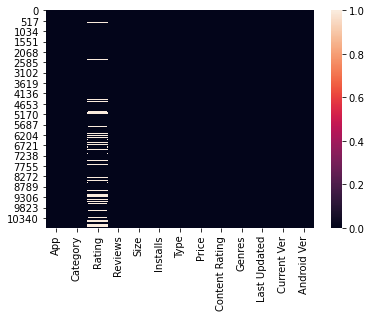

In [6]:
#Checking for null values using a heatmap
sns.heatmap(apps.isna())

In [7]:
#Imputing the null values in the rating column with the median of that column
apps['Rating'] = apps['Rating'].fillna(apps['Rating'].median())

In [8]:
#Dropping the rest of the nulls and duplicates
apps.dropna(inplace = True) 
apps.drop_duplicates(inplace=True) 

In [9]:
#Converting Last Updated into a datetime type value
apps['Last Updated']=pd.to_datetime(apps['Last Updated'])
apps['before update']=apps['Last Updated'].max()-apps['Last Updated']

In [10]:
#Cleaning Installs for unnecessary characters
apps['Installs']=apps['Installs'].str.replace(',','').str.replace('+','').astype(int)
apps['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10346, dtype: int64

In [11]:
#Converting Reviews to integer
apps['Reviews']=apps['Reviews'].astype(int)

In [12]:
apps['Size']=apps['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')
apps['Price']=apps['Price'].str.replace('$','').astype('float')

In [13]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   App             10346 non-null  object         
 1   Category        10346 non-null  object         
 2   Rating          10346 non-null  float64        
 3   Reviews         10346 non-null  int64          
 4   Size            10346 non-null  float64        
 5   Installs        10346 non-null  int64          
 6   Type            10346 non-null  object         
 7   Price           10346 non-null  float64        
 8   Content Rating  10346 non-null  object         
 9   Genres          10346 non-null  object         
 10  Last Updated    10346 non-null  datetime64[ns] 
 11  Current Ver     10346 non-null  object         
 12  Android Ver     10346 non-null  object         
 13  before update   10346 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), int6

# **Data Visualiztion**

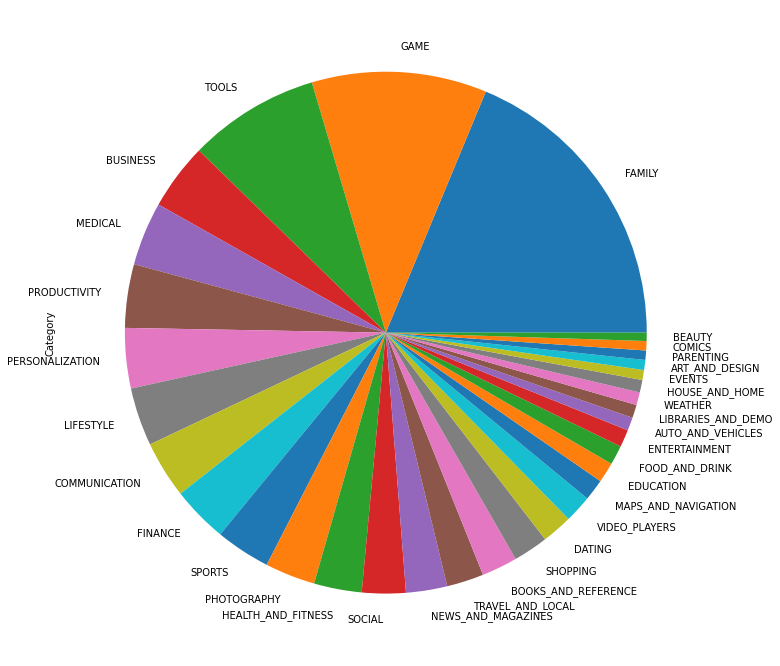

In [14]:
#App distribution by category
plt.figure(figsize=(40,12))
apps['Category'].value_counts().plot(kind='pie')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


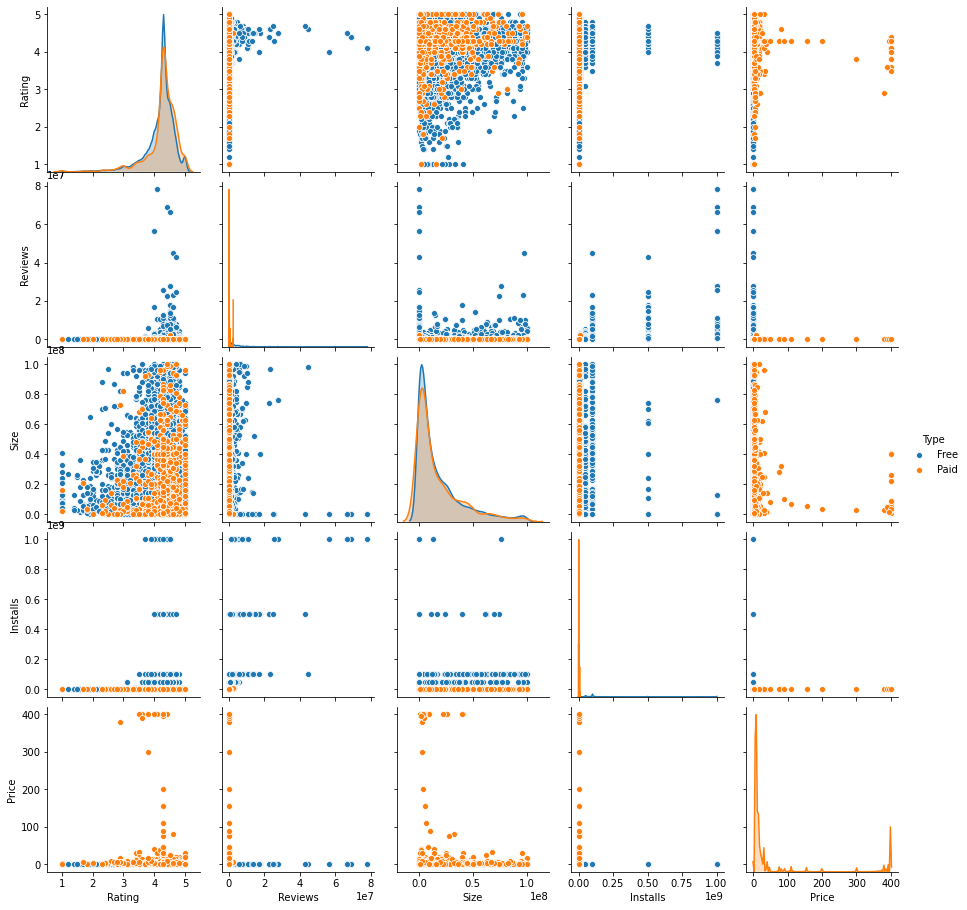

In [15]:
#Plotting the numerical values to find correlations
sns.pairplot(apps, hue='Type')

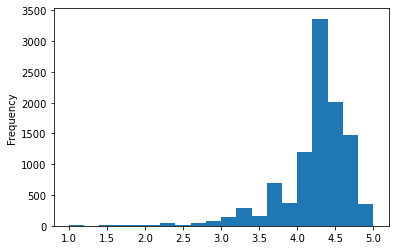

In [16]:
#Average Rating of the Apps
apps['Rating'].plot(kind='hist', bins=20)

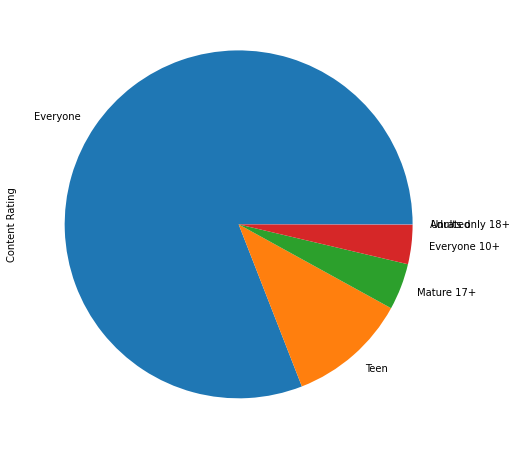

In [17]:
#Content Rating Distribution
plt.figure(figsize=(20,8))
apps['Content Rating'].value_counts().plot(kind='pie')

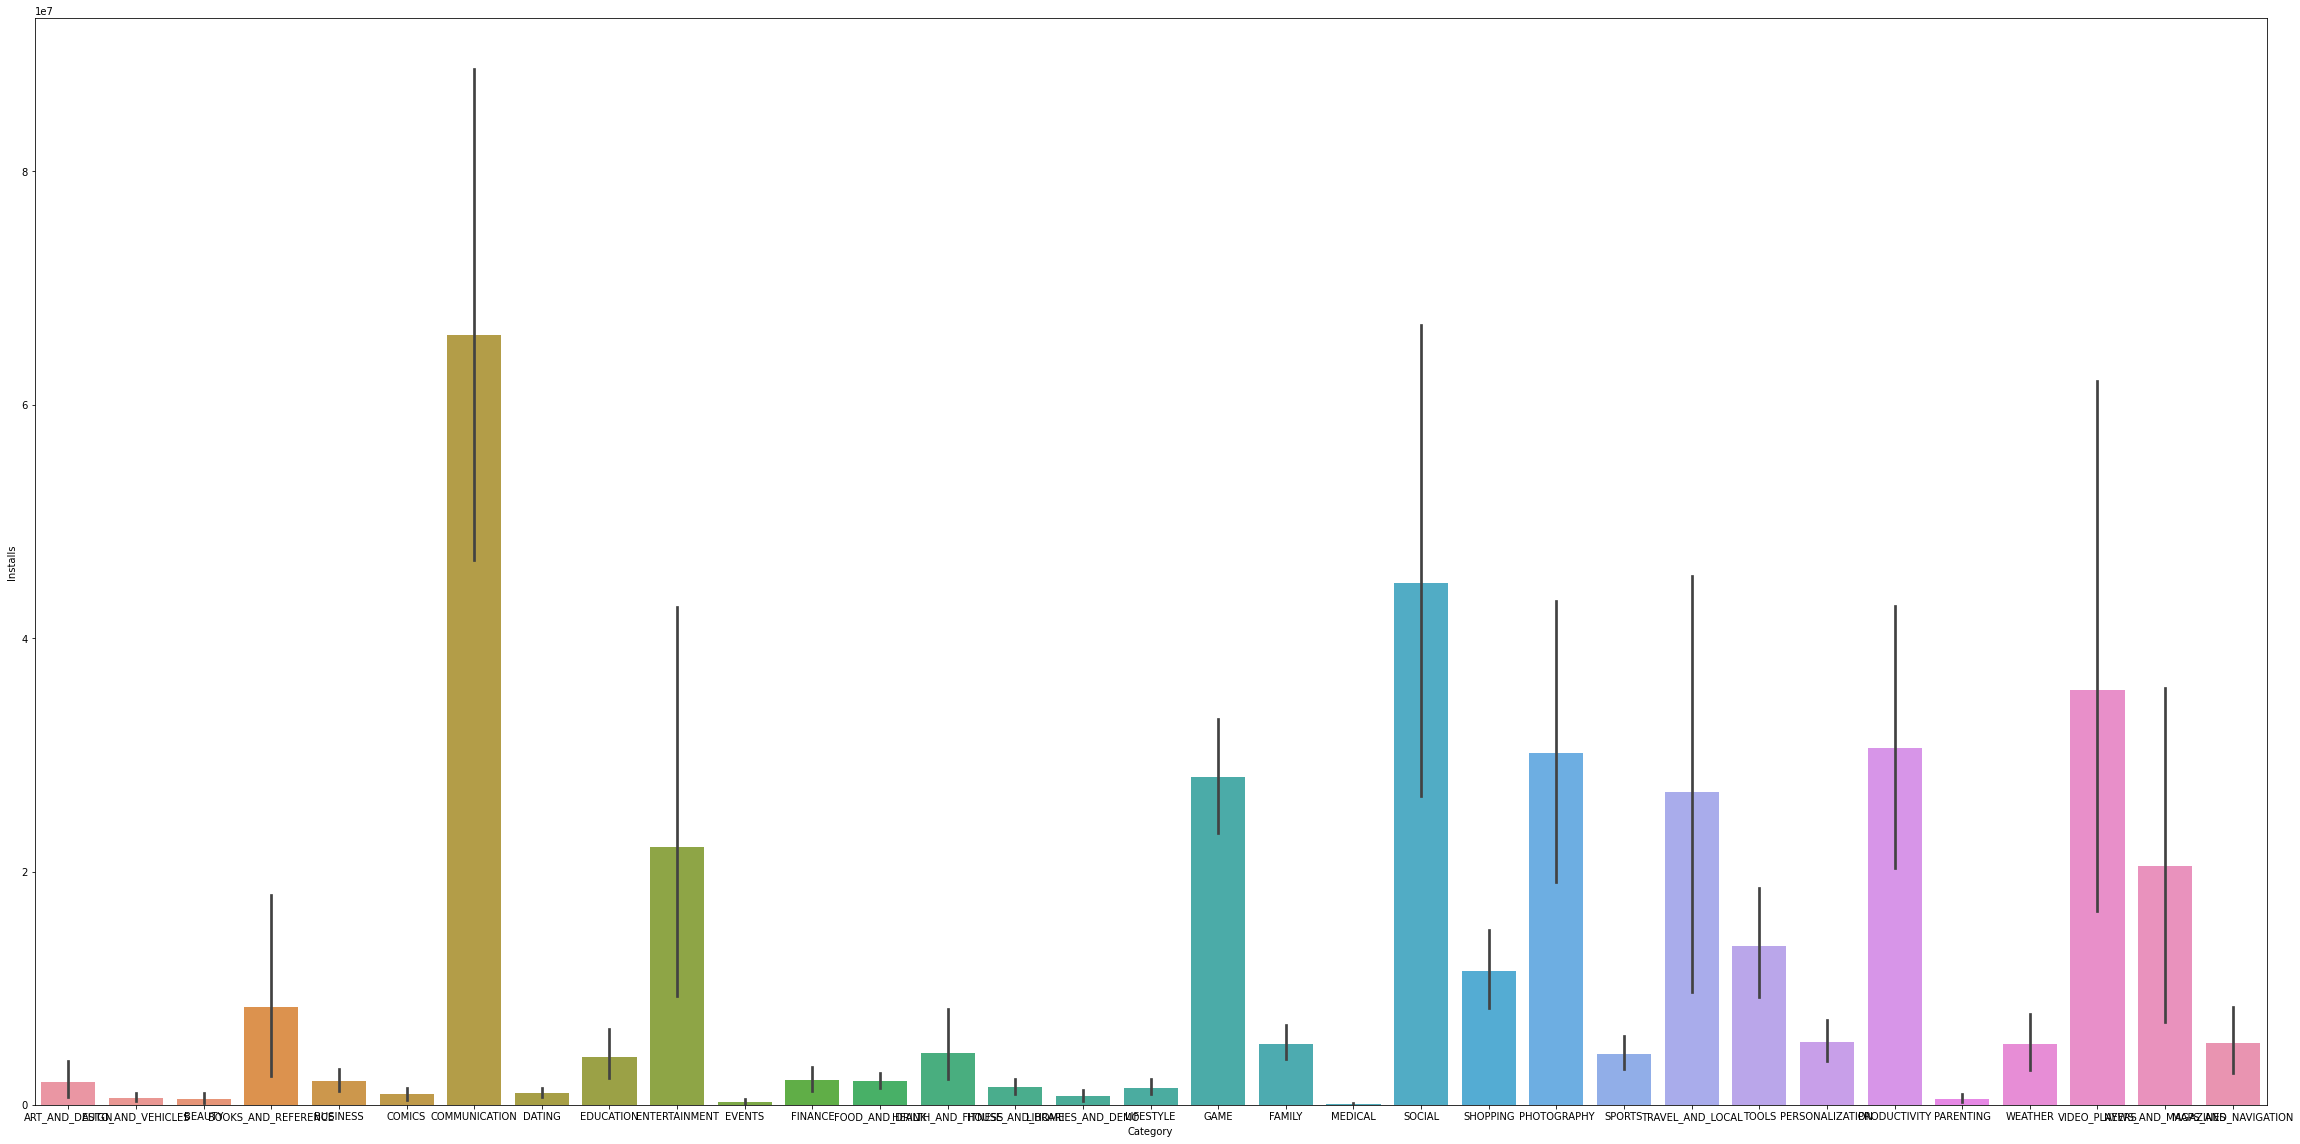

In [18]:
#Most Installed Category => Communication
plt.figure(figsize=(40,20))
sns.barplot(x='Category',y='Installs', data=apps)

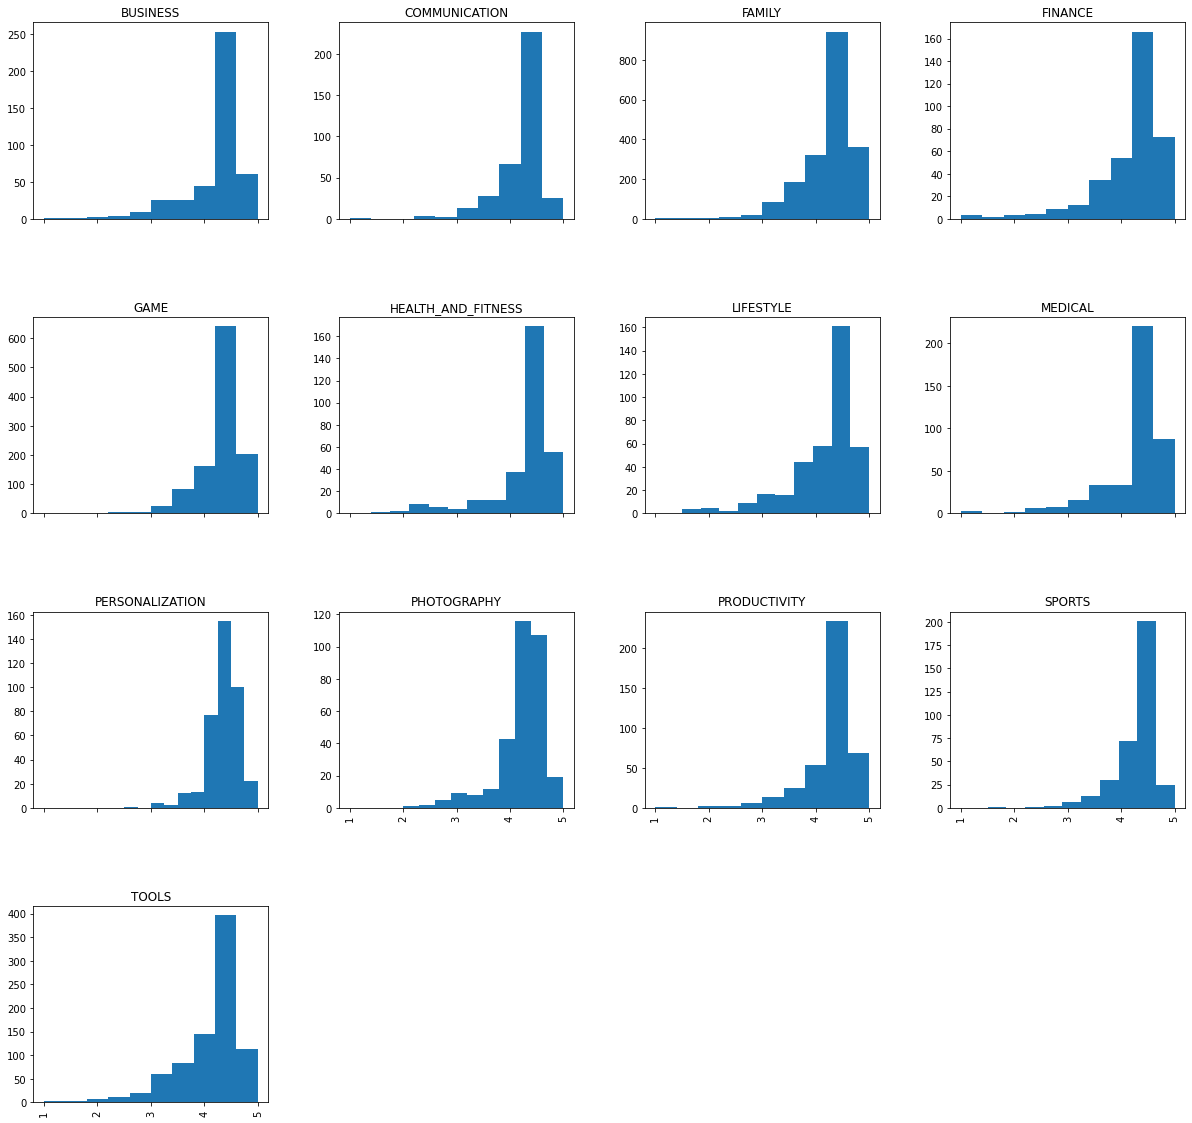

In [19]:
#Average Rating by Category
groups = apps.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
categoryrating = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

# **Data Modeling**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [21]:
#Separating Target Column
X=apps[['Category','Reviews','Size','Installs','Type','Price','Content Rating','Genres','before update']]
y=apps['Rating']

#Scaling 'before update' column
scaler=MinMaxScaler()
scaler.fit(X[['before update']])
X[['before update']]=scaler.transform(X[['before update']])
X

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,before update
0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,0.070976
1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,0.068311
2,ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,0.002333
3,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,0.020327
4,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,0.016328
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,38,53000000.0,5000,Free,0.0,Everyone,Education,0.126291
10837,FAMILY,4,3600000.0,100,Free,0.0,Everyone,Education,0.010996
10838,MEDICAL,3,9500000.0,1000,Free,0.0,Everyone,Medical,0.188271
10839,BOOKS_AND_REFERENCE,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,0.432189


In [22]:
#Encoding categorical values as model works with numerical data
encoded_x=pd.get_dummies(X, columns=['Category',"Content Rating","Type","Genres"])
encoded_x

,Reviews,Size,Installs,Price,before update,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,159,19000000.0,10000,0.0,0.070976,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14000000.0,500000,0.0,0.068311,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8700000.0,5000000,0.0,0.002333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25000000.0,50000000,0.0,0.020327,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2800000.0,100000,0.0,0.016328,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,38,53000000.0,5000,0.0,0.126291,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,4,3600000.0,100,0.0,0.010996,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,3,9500000.0,1000,0.0,0.188271,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,114,0.0,1000,0.0,0.432189,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Splitting the cleaned and encoded data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(encoded_x,y,test_size = 0.25, random_state = 10)

In [24]:
#Scaling data for better model score
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train.shape,X_test.shape

((7759, 165), (2587, 165))

In [25]:
#Training the model
rf= RandomForestRegressor(n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [26]:
#Predictiong the ratings and checking model score
predictions=rf.predict(X_test)
'Training Score:', rf.score(X_train,y_train),'Testing Score:',rf.score(X_test,y_test)

('Training Score:', 0.8788181511095826, 'Testing Score:', 0.1551206151408827)

In [27]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.4540288543746235)

In [28]:
predict_dataframe = pd.DataFrame(data={"Predicted": predictions, "Actual": y_test})
predict_dataframe

,Predicted,Actual
2349,4.388,4.7
1931,4.452,4.5
186,4.372,4.4
9788,4.487,4.7
5049,4.297,4.4
...,...,...
1497,3.988,4.0
2335,4.559,4.2
1354,4.301,4.6
706,4.322,4.7
